Libraries

In [1]:
import os 
os.chdir(os.path.dirname(os.getcwd()))
print("Current Working Directory " , os.getcwd())

import numpy as np
import scipy.io as sio
from skimage.transform import resize
import matplotlib.pyplot as plt

import torch
from colibri_hdsp.optics.tensorial import *

Current Working Directory  /home/enmartz/Projects/hdsp/colibri-hdsp


Parameters

In [2]:
M = 32
N = M
L = 4
S = 2

Data

Text(0.5, 1.0, 'Spectral Image')

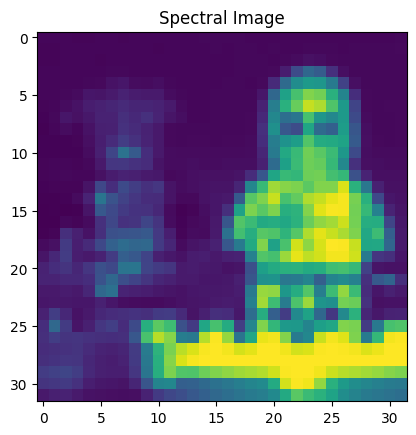

In [45]:
d = sio.loadmat('colibri-hdsp/examples/data/lego.mat')['hyperimg']
d = resize(d[..., ::int(d.shape[-1] / L)], [M, N, L])
d = torch.tensor(d, dtype=torch.float32).permute(2, 0, 1)

plt.figure()
plt.imshow(d[0])
plt.title('Spectral Image')

Coded Apertures

In [46]:
CAs = torch.zeros((S, M, N))
for s in range(S):
    CAs[s] = torch.round(torch.rand(M, N))

Sensing and computation of P and Q

In [47]:
b = sensingH(d, CAs)
P = Computep(CAs, L)
Q = Computeq(CAs, L)

plt.figure()
plt.imagesc(b[0])
plt.title('Measurement')

plt.figure()
plt.imagesc(P[0, 0])
plt.title('P_11')

plt.figure()
plt.imagesc(Q[0, 0])
plt.title('Q_11')

RuntimeError: The size of tensor a (4) must match the size of tensor b (2) at non-singleton dimension 1